In [5]:
# Use the CVXOPT library to find λ, then determine w and b,
# and derive the equation of the hyperplane for both hard margin and soft margin.

     pcost       dcost       gap    pres   dres
 0: -7.6444e-01 -1.9378e+00  1e+00  2e-16  2e+00
 1: -9.1982e-01 -1.0024e+00  8e-02  2e-16  3e-01
 2: -9.9717e-01 -1.0105e+00  1e-02  3e-16  9e-16
 3: -9.9957e-01 -1.0005e+00  1e-03  1e-16  5e-16
 4: -9.9994e-01 -1.0001e+00  1e-04  2e-16  5e-16
 5: -9.9999e-01 -1.0000e+00  2e-05  4e-16  4e-16
 6: -1.0000e+00 -1.0000e+00  3e-06  7e-19  1e-16
 7: -1.0000e+00 -1.0000e+00  4e-07  3e-16  3e-16
 8: -1.0000e+00 -1.0000e+00  5e-08  2e-16  3e-16
 9: -1.0000e+00 -1.0000e+00  8e-09  5e-16  4e-16
10: -1.0000e+00 -1.0000e+00  1e-09  2e-16  3e-16
11: -1.0000e+00 -1.0000e+00  2e-10  3e-16  3e-16
12: -1.0000e+00 -1.0000e+00  2e-11  2e-16  4e-16
Optimal solution found.

lambda = [0. 1. 1.]
w = [[1. 1.]]
b = -3.0


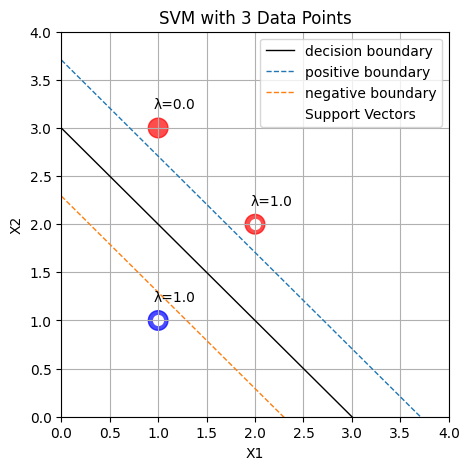


Margin = 1.4142


In [6]:
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt

# 3 data points
x = np.array([[1., 3.], [2., 2.], [1., 1.]])
y = np.array([[1.], [1.], [-1.]])

# ---- Calculate lambda using cvxopt ----

# Calculate H matrix
H = np.dot(y * x, (y * x).T)  # Tạo ma trận H từ dữ liệu

# Construct the matrices required for QP in standard form
n = x.shape[0]
P = matrix(H)
q = matrix(-np.ones(n))  # Chỉnh sửa để q là vector 1D
G = matrix(-np.eye(n))
h = matrix(np.zeros(n))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

# solver parameters
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# Perform QP
sol = solvers.qp(P, q, G, h, A, b)

# the solution of the QP, λ
lamb = np.array(sol['x'])

# ---------------------------------------------------------------

# Calculate w using the lambda, which is the solution to QP
w = np.dot(lamb.T, y * x)  # w = Σλ_i * y_i * x_i

# Find support vectors
sv_idx = np.where(lamb > 1e-5)[0]
sv_lamb = lamb[sv_idx]
sv_x = x[sv_idx]
sv_y = y[sv_idx].flatten()  # Sử dụng flatten để đưa về 1D

# Calculate b using the support vectors and calculate the average
b = np.mean(sv_y.flatten() - np.dot(sv_x, w.flatten()))  
# With w and b, we can determine the Separating Hyperplane

print('\nlambda =', np.round(lamb.flatten(), 3))
print('w =', np.round(w, 3))
print('b =', np.round(b, 3))

# Visualize the data points
plt.figure(figsize=(5, 5))
color = ['red' if a == 1 else 'blue' for a in y.flatten()]  # Sử dụng flatten cho y
plt.scatter(x[:, 0], x[:, 1], s=200, c=color, alpha=0.7)
plt.xlim(0, 4)
plt.ylim(0, 4)

# Visualize the decision boundary
x1_dec = np.linspace(0, 4, 100)
w_flat = w.flatten()
x2_dec = -(w_flat[0] * x1_dec + b) / w_flat[1]
plt.plot(x1_dec, x2_dec, c='black', lw=1.0, label='decision boundary')

# Visualize the positive & negative boundary
w_norm = np.sqrt(np.sum(w ** 2))  
w_unit = w / w_norm  
half_margin = 1 / w_norm  

upper = x2_dec + half_margin
lower = x2_dec - half_margin 

plt.plot(x1_dec, upper, '--', lw=1.0, label='positive boundary')
plt.plot(x1_dec, lower, '--', lw=1.0, label='negative boundary')

plt.scatter(sv_x[:, 0], sv_x[:, 1], s=50, marker='o', c='white', label='Support Vectors')

for s, (x1, x2) in zip(lamb, x):
    plt.annotate(f'λ={s[0].round(2)}', (x1 - 0.05, x2 + 0.2))

plt.legend()
plt.title('SVM with 3 Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

print("\nMargin = {:.4f}".format(half_margin * 2))  


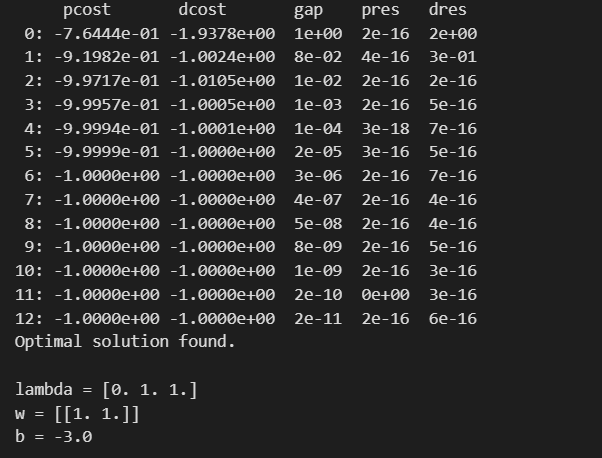

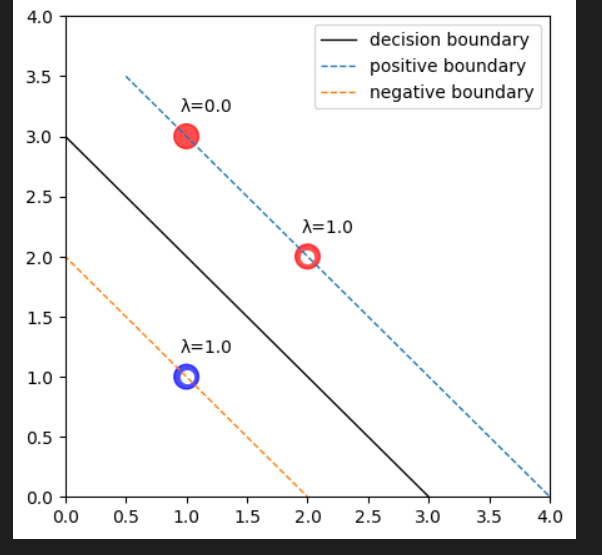

     pcost       dcost       gap    pres   dres
 0:  1.2279e+03 -1.3111e+04  1e+04  7e-15  2e-14
 1:  1.1798e+02 -1.5089e+03  2e+03  1e-16  6e-15
 2: -2.2267e+02 -4.9527e+02  3e+02  9e-15  5e-15
 3: -2.9686e+02 -4.0621e+02  1e+02  3e-14  8e-15
 4: -3.0744e+02 -3.7129e+02  6e+01  1e-14  8e-15
 5: -3.3295e+02 -3.4899e+02  2e+01  1e-14  9e-15
 6: -3.4016e+02 -3.4210e+02  2e+00  2e-14  1e-14
 7: -3.4089e+02 -3.4091e+02  2e-02  1e-14  1e-14
 8: -3.4090e+02 -3.4090e+02  2e-04  3e-15  1e-14
 9: -3.4090e+02 -3.4090e+02  2e-06  2e-14  1e-14
10: -3.4090e+02 -3.4090e+02  2e-08  2e-14  1e-14
Optimal solution found.


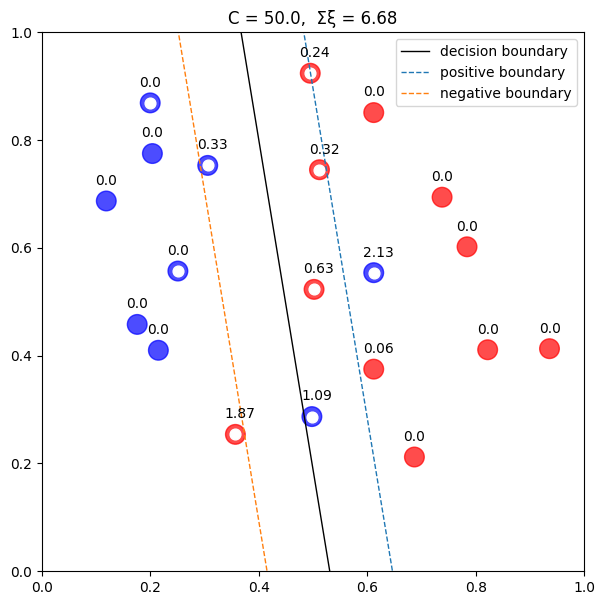

In [7]:
import numpy as np
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import matplotlib.pyplot as plt

# training data
x = np.array([[0.2, 0.869],
              [0.687, 0.212],
              [0.822, 0.411],
              [0.738, 0.694],
              [0.176, 0.458],
              [0.306, 0.753],
              [0.936, 0.413],
              [0.215, 0.410],
              [0.612, 0.375],
              [0.784, 0.602],
              [0.612, 0.554],
              [0.357, 0.254],
              [0.204, 0.775],
              [0.512, 0.745],
              [0.498, 0.287],
              [0.251, 0.557],
              [0.502, 0.523],
              [0.119, 0.687],
              [0.495, 0.924],
              [0.612, 0.851]])

y = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1])
y = y.astype('float').reshape(-1, 1)

# ---- Calculate lambda using cvxopt ----

C = 50.0
N = x.shape[0]

# Construct the matrices required for QP in standard form
H = np.dot(y * x, (y * x).T)  # Tạo ma trận H
P = cvxopt_matrix(H)
q = cvxopt_matrix(np.ones(N) * -1)
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

g = np.vstack([-np.eye(N), np.eye(N)])  # Định nghĩa G
G = cvxopt_matrix(g)

h1 = np.hstack([np.zeros(N), np.ones(N) * C])  # Định nghĩa h
h = cvxopt_matrix(h1)

# solver parameters
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Perform QP
sol = cvxopt_solvers.qp(P, q, G, h, A, b)

# the solution to the QP, λ
lamb = np.array(sol['x'])

# ---------------------------------------------------------------

# Calculate w using the lambda, which is the solution to QP
w = np.sum(lamb * y * x, axis=0)

# Find support vectors
sv_idx = np.where(lamb > 1e-5)[0]
sv_lamb = lamb[sv_idx]
sv_x = x[sv_idx]
sv_y = y[sv_idx]

# Calculate b using the support vectors and calculate the average
b = np.mean(sv_y - np.dot(sv_x, w))  # Tính b từ các vector hỗ trợ

# With w and b, we can determine the Separating Hyperplane

# Visualize the data points
plt.figure(figsize=(7, 7))
color = ['red' if a == 1 else 'blue' for a in y]
plt.scatter(x[:, 0], x[:, 1], s=200, c=color, alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Visualize the decision boundary
x1_dec = np.linspace(0, 1, 100)
x2_dec = -(w[0] * x1_dec + b) / w[1]  
plt.plot(x1_dec, x2_dec, c='black', lw=1.0, label='decision boundary')

# Display slack variables
y_hat = np.dot(x, w) + b  
slack = np.maximum(0, 1 - y_hat * y.flatten())  

for s, (x1, x2) in zip(slack, x):
    plt.annotate(str(s.round(2)), (x1 - 0.02, x2 + 0.03))

# Visualize the positive & negative boundary
w_norm = np.sqrt(np.sum(w_flat ** 2))  # Tính độ dài của w
half_margin = 1 / w_norm  # Độ rộng margin

# Tính các đường biên
upper = x2_dec + half_margin  # Thêm half_margin vào x2_dec
lower = x2_dec - half_margin  # Trừ half_margin từ x2_dec

# Vẽ các đường biên
plt.plot(x1_dec, upper, '--', lw=1.0, label='positive boundary')
plt.plot(x1_dec, lower, '--', lw=1.0, label='negative boundary')

plt.scatter(sv_x[:, 0], sv_x[:, 1], s=60, marker='o', c='white')
plt.legend()
plt.title('C = ' + str(C) + ',  Σξ = ' + str(np.sum(slack).round(2)))
plt.show()


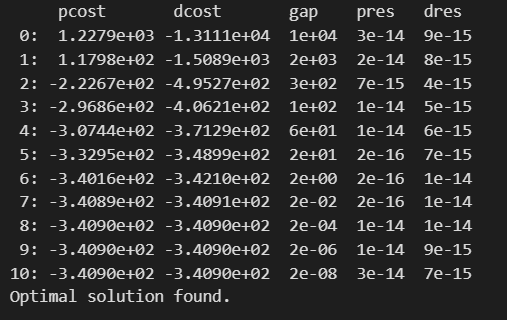

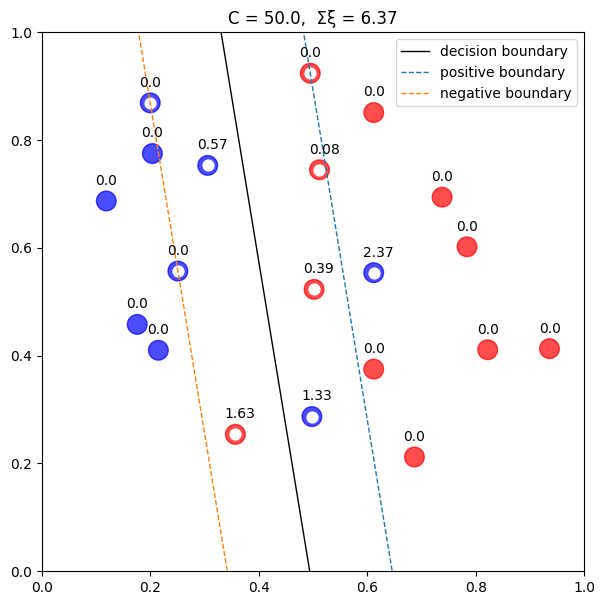

In [8]:
# Predicted points that lie on or above the hyperplane are assigned to the positive class,
# while those below the hyperplane are assigned to the negative class.